# Παπαγαλία

* Με υλικό από Michael Bowles, *Machine Learning in Python*, Wiley, 2015.

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

* Θα εμβαθύνουμε στη λειτουργία των δένδρων αποφάσεων χρησιμοποιώντας ένα συνθετικό σύνολο δεδομένων.

* Υποθέτουμε ότι έχουμε ένα πείραμα όπου μετράμε τη σχέση δύο μεταβλητών.

* Ξέρουμε ότι η πραγματική σχέση είναι `y = x`.

* Αλλά σε ένα πείραμα πάντα υπάρχει ένας θόρυβος, οπότε οι μετρήσεις μας θα είναι `y = x + random`.

* Έστω ότι έχουμε 100 παρατηρήσεις για το `x`, από το -0,5 ως και το +0,5.

In [1]:
import numpy as np

x = np.linspace(-.5, .5, 100)

* Το scikit-learn θέλει τα δεδομένα να είναι της μορφής `n_samples`, `n_features`.

* Εδώ έχουμε n_features = 1.

* Άρα πρέπει να βάλουμε την κάθε παρατήρηση `x` σε έναν χωριστό πίνακα.

In [2]:
xs = x.reshape(x.shape[0], 1)
print(xs[:10])

[[-0.5       ]
 [-0.48989899]
 [-0.47979798]
 [-0.46969697]
 [-0.45959596]
 [-0.44949495]
 [-0.43939394]
 [-0.42929293]
 [-0.41919192]
 [-0.40909091]]


* Θα παράξουμε τις τιμές `y`.

* Θυμηθείτε, πρόκειται για *συνθετικά* δεδομένα.

In [3]:
np.random.seed(1)
y = x + np.random.normal(loc=0, scale=0.1, size=x.shape[0])
print(y[:10])

[-0.33756546 -0.55107463 -0.53261516 -0.57699383 -0.3730552  -0.67964882
 -0.26491276 -0.50541362 -0.38728801 -0.43402795]


* Για να δούμε πώς είναι τα δεδομένα.

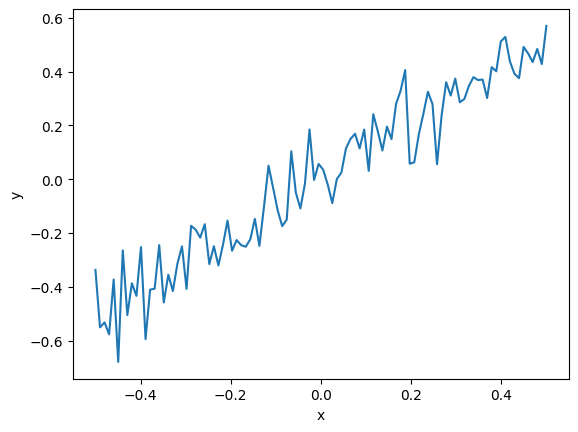

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.plot(x, y)
plt.xlabel('x')
_ = plt.ylabel('y')

* Θα χρησιμοποιήσουμε έναν`DecisionTreeRegressor`.

* Θα θέσουμε το βάθος του δένδρου ίσο με ένα.

In [5]:
from sklearn.tree import DecisionTreeRegressor

simple_tree = DecisionTreeRegressor(max_depth=1)
simple_tree.fit(xs, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


* Το βάθος ένα σημαίνει ότι στην ουσία το δένδρο θα επιλέξει μια τιμή `x` που θα διαμοιράσει τα δεδομένα στα δύο.

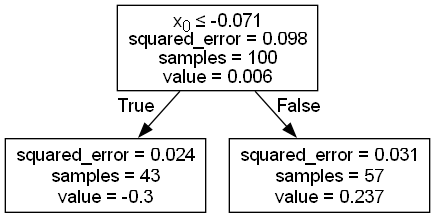

In [6]:
from sklearn.tree import export_graphviz, export_text
from IPython.display import Image
import graphviz

# Export decision tree to DOT format
dot_data = export_graphviz(simple_tree, 
                          out_file=None,  # Return string instead of writing to file
                          special_characters=True)

# Create graphviz object from DOT data
graph = graphviz.Source(dot_data)

# Display the image
Image(graph.pipe(format='png'))

* Η προβλεπόμενη τιμή για κάθε υποσύνολο φαίνεται στο πεδίο `value` του κάθε κόμβου.

* Μπορούμε να απεικονίσουμε τα αποτελέσματα του δένδρου, με βάση την πρόβλεψη για κάθε δυνατή τιμή του `x`.

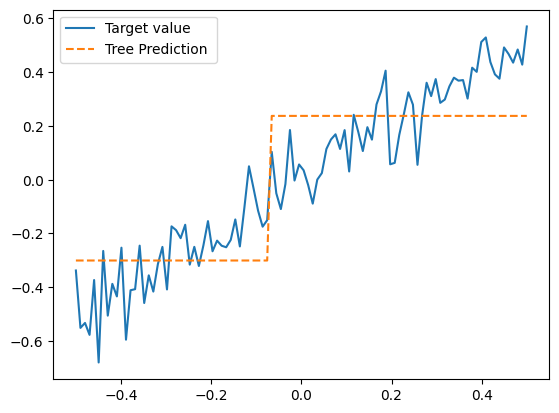

In [7]:
y_pred  = simple_tree.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

* Βλέπουμε ότι πήραμε μια συνάρτηση βήματος.

* Για να δούμε τι θα πάρουμε αν αυξήσουμε το βάθος του δένδρου.

* Θα φτιάξουμε έναν νέο`DecisionTreeRegressor` με `max_depth` ίσο με δύο.

In [8]:
simple_tree_2 = DecisionTreeRegressor(max_depth=2)
simple_tree_2.fit(xs, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


* Για να δούμε τώρα το δένδρο που πήραμε.

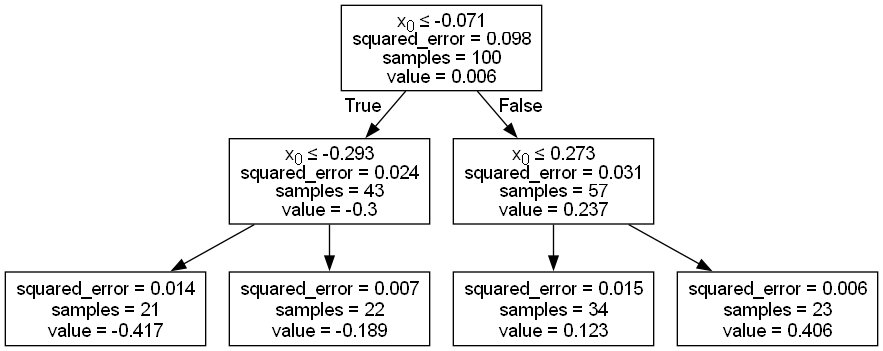

In [9]:

# Export decision tree to DOT format
dot_data = export_graphviz(simple_tree_2, 
                          out_file=None,  # Return string instead of writing to file
                          special_characters=True)

# Create graphviz object from DOT data
graph = graphviz.Source(dot_data)

# Display the image
Image(graph.pipe(format='png'))

* Μπορούμε και πάλι να απεικονίσουμε τις προβλέψεις σε σχέση με τα δεδομένα μας.

* Διαπιστώνουμε ότι οι προβλέψεις ακολουθούν τα δεδομένα μας από πιο κοντά.

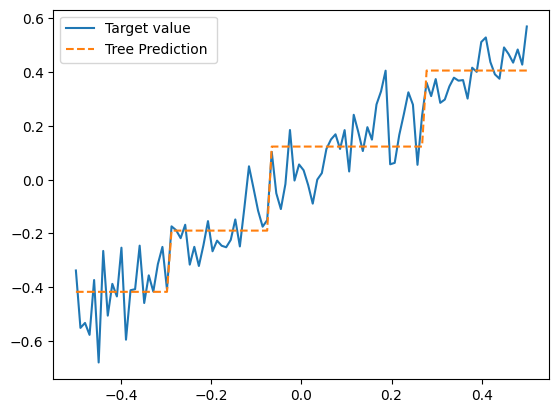

In [10]:
y_pred  = simple_tree_2.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
plt.legend()

* Υπάρχει κάποιο όριο στον αριθμό των επιπέδων του δένδρου;

* Μπορούμε να αναζητήσουμε την ιδανική τιμή για την υπερπαράμετρο`max_depth`.

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

parameters = [
  {'max_depth': list(range(1, 11))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf = clf.fit(xs, y)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=3)
{'max_depth': 3}


* Ας βάλουμε τα αποτελέσματα της αναζήτησης σε ένα `DataFrame`.

In [12]:
import pandas as pd

cv_results = pd.DataFrame(clf.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002121,0.004241,0.000000,0.000000,1,{'max_depth': 1},0.607495,0.765537,0.681682,0.654618,0.641178,0.670102,0.053363,10
1,0.000938,0.000828,0.000418,0.000513,2,{'max_depth': 2},0.821585,0.932724,0.806193,0.860453,0.817589,0.847709,0.046267,3
2,0.000400,0.000490,0.000400,0.000490,3,{'max_depth': 3},0.896470,0.949902,0.760825,0.890455,0.911057,0.881742,0.063904,1
3,0.000601,0.000491,0.000400,0.000490,4,{'max_depth': 4},0.871805,0.941957,0.753673,0.872550,0.911136,0.870224,0.063893,2
4,0.000402,0.000492,0.000602,0.000492,5,{'max_depth': 5},0.830653,0.914181,0.630490,0.881906,0.872913,0.826029,0.101339,5
5,0.000421,0.000517,0.000606,0.000494,6,{'max_depth': 6},0.830001,0.920180,0.640499,0.861733,0.889995,0.828481,0.098629,4
6,0.000566,0.000463,0.000859,0.000435,7,{'max_depth': 7},0.828934,0.910372,0.629398,0.868159,0.881861,0.823745,0.100650,9
7,0.000200,0.000400,0.000000,0.000000,8,{'max_depth': 8},0.843294,0.907984,0.622945,0.863543,0.884362,0.824426,0.103010,7
8,0.000601,0.000490,0.000381,0.000468,9,{'max_depth': 9},0.837801,0.906764,0.622945,0.863176,0.890661,0.824269,0.103384,8
9,0.000402,0.000492,0.000345,0.000459,10,{'max_depth': 10},0.843992,0.907173,0.622945,0.864144,0.890486,0.825748,0.103689,6


* Η επίδοση μετριέται με τον συντελεστή $R^2$.

* Η καλύτερη επίδοση είναι 1,0 και η χειρότερη μπορεί να είναι αρνητική (σε αντίθεση με τη γραμμική παλινδρόμηση). 

* Ένα μοντέλο που προβλέπει πάντα τη μέση τιμή του `y` θα έχει επίδοση 0.

* Διαγραμματικά μπορούμε να δούμε ότι η επίδοση βελτιώνεται μέχρι βάθος τρία, και μετά αρχίζει και μειώνεται.

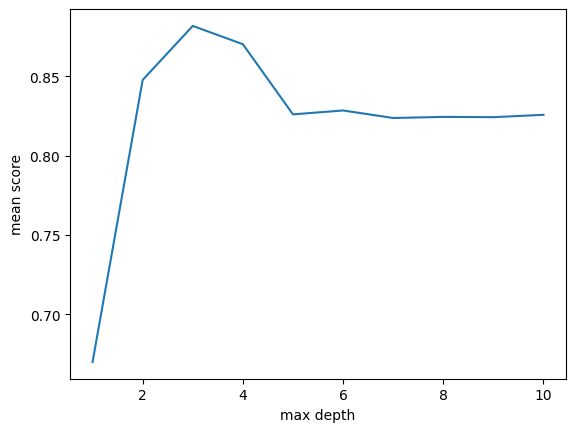

In [13]:
plt.plot(cv_results['param_max_depth'], cv_results['mean_test_score'], label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mean score')

* Για αυτό το βάθος τρία, οι προβλέψεις είναι ως εξής:

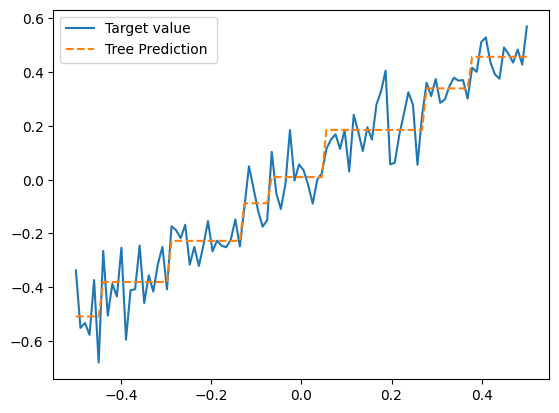

In [14]:
simple_tree_3 = DecisionTreeRegressor(max_depth=3)
simple_tree_3.fit(xs, y)
y_pred  = simple_tree_3.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--')
_ = plt.legend()

* Ποιο είναι το πρόβλημα με μεγαλύτερες τιμές του βάθους;

* Για παράδειγμα, τι γίνεται με `max_depth=10`;

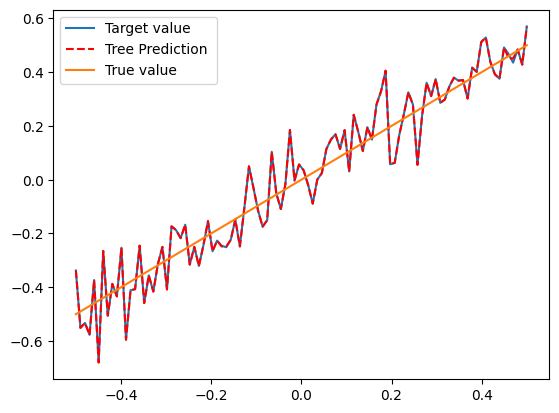

In [15]:
simple_tree_10 = DecisionTreeRegressor(max_depth=10)
simple_tree_10.fit(xs, y)
y_pred  = simple_tree_10.predict(xs)
plt.plot(x, y, label='Target value')
plt.plot(x, y_pred, label='Tree Prediction ', linestyle='--', color='r')
plt.plot(x, x, label='True value')
_ = plt.legend()

* Αυτό που συμβαίνει είναι ότι το μοντέλο μας *παπαγάλισε* τα δεδομένα!

* Προβλέπει σχεδόν τέλεια τις τιμές των δεδομένων που έχουμε.

In [16]:
y - y_pred

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00285114, -0.00285114,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

* Πλην όμως, αν το σκεφτούμε, έχουμε φτιάξει ένα τεράστιο δένδρο.

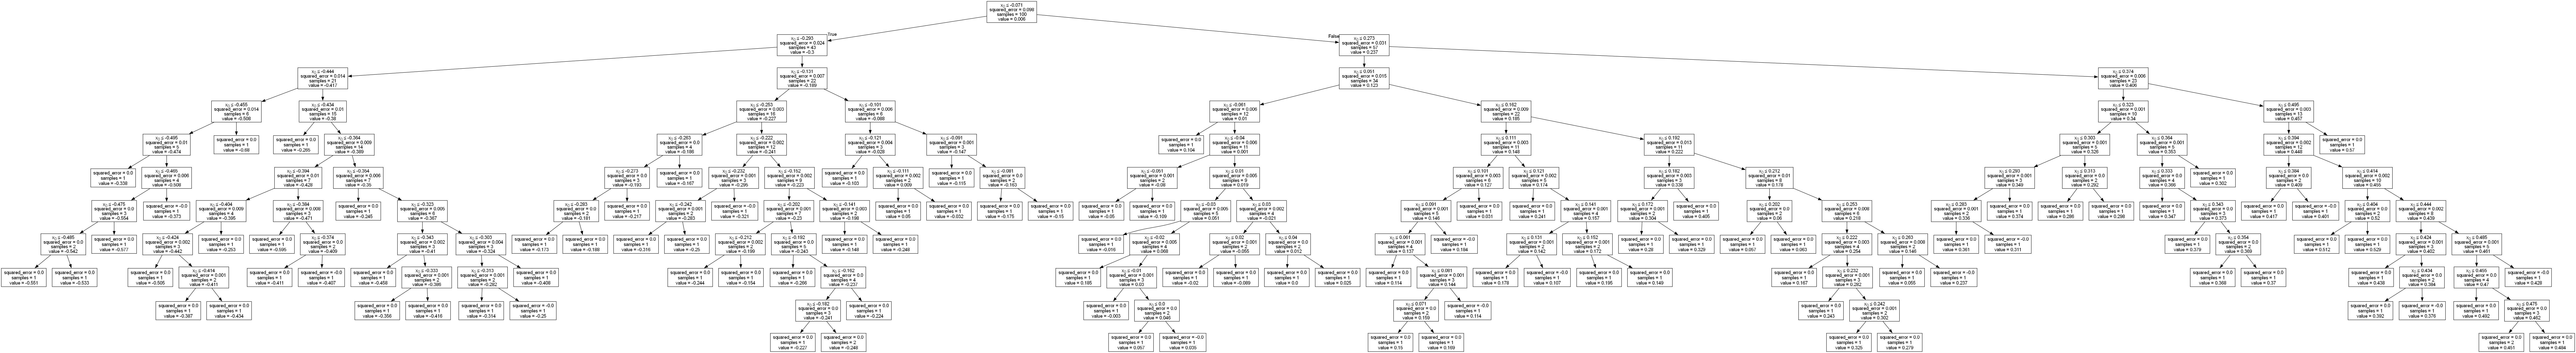

In [17]:
# Export decision tree to DOT format
dot_data = export_graphviz(simple_tree_10, 
                          out_file=None,  # Return string instead of writing to file
                          special_characters=True)

# Create graphviz object from DOT data
graph = graphviz.Source(dot_data)

# Display the image
Image(graph.pipe(format='png')) 

In [18]:
print(export_text(simple_tree_10))

|--- feature_0 <= -0.07
|   |--- feature_0 <= -0.29
|   |   |--- feature_0 <= -0.44
|   |   |   |--- feature_0 <= -0.45
|   |   |   |   |--- feature_0 <= -0.49
|   |   |   |   |   |--- value: [-0.34]
|   |   |   |   |--- feature_0 >  -0.49
|   |   |   |   |   |--- feature_0 <= -0.46
|   |   |   |   |   |   |--- feature_0 <= -0.47
|   |   |   |   |   |   |   |--- feature_0 <= -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.55]
|   |   |   |   |   |   |   |--- feature_0 >  -0.48
|   |   |   |   |   |   |   |   |--- value: [-0.53]
|   |   |   |   |   |   |--- feature_0 >  -0.47
|   |   |   |   |   |   |   |--- value: [-0.58]
|   |   |   |   |   |--- feature_0 >  -0.46
|   |   |   |   |   |   |--- value: [-0.37]
|   |   |   |--- feature_0 >  -0.45
|   |   |   |   |--- value: [-0.68]
|   |   |--- feature_0 >  -0.44
|   |   |   |--- feature_0 <= -0.43
|   |   |   |   |--- value: [-0.26]
|   |   |   |--- feature_0 >  -0.43
|   |   |   |   |--- feature_0 <= -0.36
|   |   |   |   |   |---

* Το δένδρο έχει σχεδόν τόσα φύλλα όσα και τα δεδομένα μας.

In [19]:
print(simple_tree_10.get_n_leaves())

98


* Αλλά θυμηθείτε ότι η πραγματική σχέση που θα θέλαμε να βρούμε είναι η σχέση `y = x`.

* Οπότε μπορούμε να δούμε πώς τα δένδρα με διαφορετικό βάθος προβλέπουν τα *πραγματικά* δεδομένα.

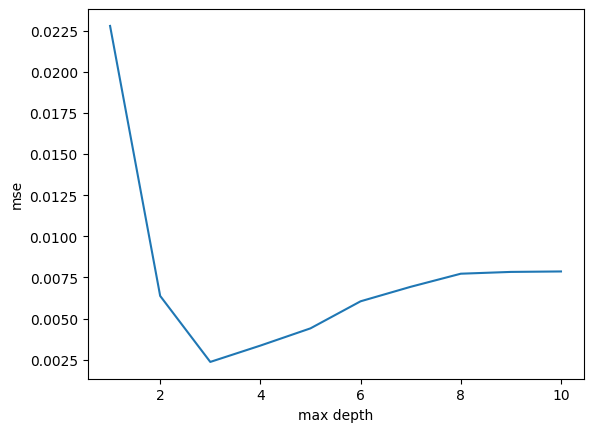

In [20]:
from sklearn.metrics import mean_squared_error

all_depths = []
all_mses = []
y_true = x

for max_depth in range(1, 11):
    all_depths.append(max_depth)
    simple_tree = DecisionTreeRegressor(max_depth=max_depth)
    simple_tree.fit(xs, y)
    y_pred  = simple_tree.predict(xs)
    mse = mean_squared_error(y_true, y_pred)
    all_mses.append(np.mean(mse))
    
plt.plot(all_depths, all_mses, label='True y')
plt.xlabel('max depth')
_ = plt.ylabel('mse')

* Είμαστε μάρτυρες του φαινομένου της *υπερπροσαρμογής* (overfitting).

* Η υπερποσαρμογή είναι, δυστυχώς, η κακιά κατάρα που μας κυνηγάει πάντα στη Μηχανική Μάθηση.

* Διδακτική ιστορία: Το Πρόβλημα της Γρίπης της Google.

* Ginsberg, J., Mohebbi, M., Patel, R. et al. Detecting influenza epidemics using search engine query data. Nature 457, 1012–1014 (2009). https://doi.org/10.1038/nature07634.

* Lazer, D., R. Kennedy, G. King, and A. Vespignani. 2014. “The Parable of Google Flu: Traps in Big Data Analysis.” Science 343 (6176) (March 14): 1203–1205. http://nrs.harvard.edu/urn-3:HUL.InstRepos:12016836.

> This should have been a warning that the big data were overfitting the small number of cases—a standard concern in data analysis. 

* Δεν υπάρχει απλή λύση για την αποφυγή της υπεπροσαρμογής.

* Χρειάζεται πάντα καλή επικύρωση των δεδομένων μας.

* Πρέπει πάντοτε να ελέγχουμε ότι τα δεδομένα εκπαίδευσης αντιστοιχούν στα δεδομένα που το σύστημα θα βρει στην παραγωγή.

* Πρέπει το μοντέλο να μην είναι πιο περίπλοκο (δυνατό) από ότι επιβάλλει η φύση και τα δεδομένα του προβλήματος.

* Να έχετε τα μάτια σας ανοιχτά!